<a href="https://colab.research.google.com/github/ekaratnida/Automated_Tools-/blob/keep/Mini-bads3/Module3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Forecasting Using FbProphet

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# load data
path = 'https://raw.githubusercontent.com/ekaratnida/Automated_Tools-/keep/Mini-bads3/monthly-car-sales.csv'
df = pd.read_csv(path)
print(df.head())
print(df.info())
print(df.tail())


     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None
       Month  Sales
103  1968-08  16722
104  1968-09  14385
105  1968-10  21342
106  1968-11  17180
107  1968-12  14577


[0, 12, 24, 36, 48, 60, 72, 84, 96]


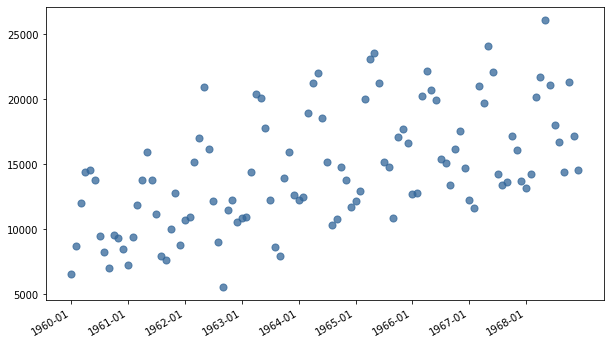

In [23]:
x = df['Month']
y = df['Sales']

fig, ax = plt.subplots(1,1,figsize=(10,6)) #width x height (inch)
ax.scatter(x, y, s = 50, color = '#336699', alpha = 0.75)
test = ax.get_xticks()
print(test[::12])
ax.set_xticks(test[::12]) # It gets every tenth item of the sequence sliced, [start:end:step]
fig.autofmt_xdate()

In [24]:
df1 = df.copy() #Just save the original df
df1.set_index('Month',inplace=True) #df1 = df1.set_index('Month')
df1.index = pd.to_datetime(df1.index) #convert index to date time type 
print("#NA = ",df1.isna().sum())
df1.dropna(inplace=True) #clean NA if exist
print(df1.head())

#NA =  Sales    0
dtype: int64
            Sales
Month            
1960-01-01   6550
1960-02-01   8728
1960-03-01  12026
1960-04-01  14395
1960-05-01  14587


#Time-series analytics
## 1. Decomposition
### 1.1 Good lecture note https://online.stat.psu.edu/stat510/lesson/5/5.1

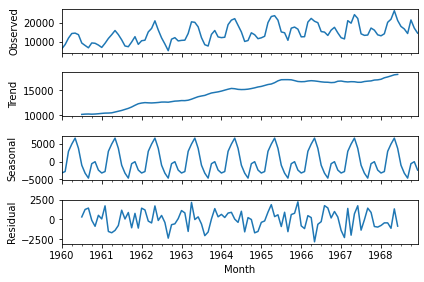

In [25]:
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
from statsmodels.tsa.seasonal import seasonal_decompose #Seasonal decomposition using moving averages.

result = seasonal_decompose(df1['Sales'],  model='additive')
result.plot();

# Trend: The increasing or decreasing value in the series. 
# Seasonality: The repeating short-term cycle in the series.


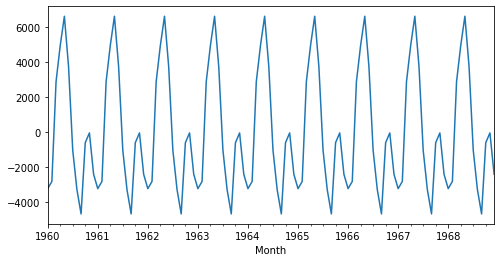

In [26]:
plt.figure(figsize = (8,4))
result.seasonal.plot();

In [27]:
# ARIMA, an autoregressive integrated moving average (ARIMA) model
from statsmodels.tsa.arima_model import ARIMA

# Train model
# A nonseasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, where:
# - p is the number of autoregressive terms,
# - d is the number of nonseasonal differences needed for stationarity, and
# - q is the number of lagged forecast errors in the prediction equation.

arima = ARIMA(df1['Sales'], order=(5,1,0)) #  
arimaModel = arima.fit()
print(arimaModel.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  107
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -999.662
Method:                       css-mle   S.D. of innovations           2746.033
Date:                Thu, 02 Dec 2021   AIC                           2013.324
Time:                        11:14:00   BIC                           2032.033
Sample:                    02-01-1960   HQIC                          2020.908
                         - 12-01-1968                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            49.3780    191.306      0.258      0.797    -325.575     424.331
ar.L1.D.Sales     0.0558      0.095      0.586      0.559      -0.131       0.242
ar.L2.D.Sales     0.0026      0.093     

start at  96
end at  107
1968-01-01    12086.533979
1968-02-01    12641.281138
1968-03-01    16334.386782
1968-04-01    21202.826904
1968-05-01    21153.075633
1968-06-01    23798.967294
1968-07-01    18800.922031
1968-08-01    17029.379079
1968-09-01    17657.405744
1968-10-01    17828.757305
1968-11-01    22127.063793
1968-12-01    17654.538444
Freq: MS, Name: ARIMA Predictions, dtype: float64


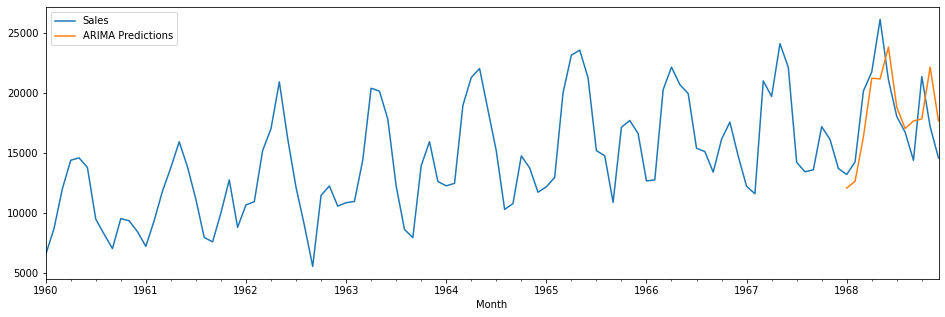

In [28]:
#Prediction
startAt = len(df1)-12 #last year
print("start at ", startAt)
endAt = len(df1)-1
print("end at ", endAt)
arima_pred = arimaModel.predict(start = startAt, end = endAt , typ="levels").rename("ARIMA Predictions")
print(arima_pred)

df1['Sales'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

# Evaluation

In [29]:
from statsmodels.tools.eval_measures import rmse
#Model Evaluation
print(type(df1['Sales'][-12:]))
print(type(arima_pred))
rmse = rmse(df1['Sales'][-12:], arima_pred)

print(f'RMSE Error: {rmse}')

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
RMSE Error: 3001.785840970583


<H1> What does the RMSE tell you? </H1> ✈

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

✈

# Forcasting

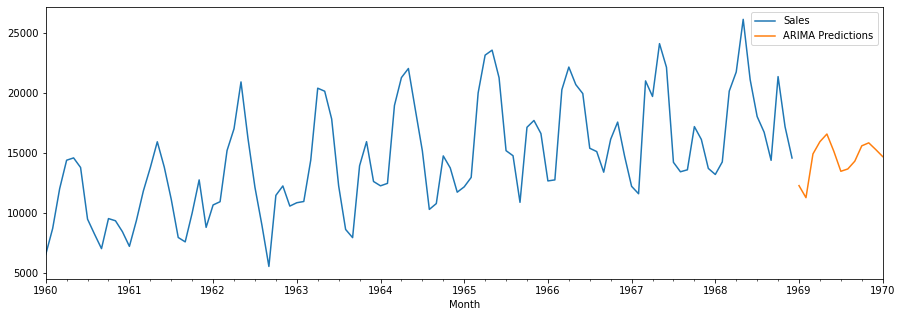

In [30]:
#Prediction
# typ : str {‘linear’, ‘levels’}
#    ‘linear’ : Linear prediction in terms of the differenced endogenous variables.
#    ‘levels’ : Predict the levels of the original endogenous variables.
#

arima_pred = arimaModel.predict(start = len(df1), end = len(df1)+12, typ="levels").rename("ARIMA Predictions")
arima_pred

df1['Sales'].plot(figsize = (15,5), legend=True)
arima_pred.plot(legend = True);

#Prophet 
https://facebook.github.io/prophet/

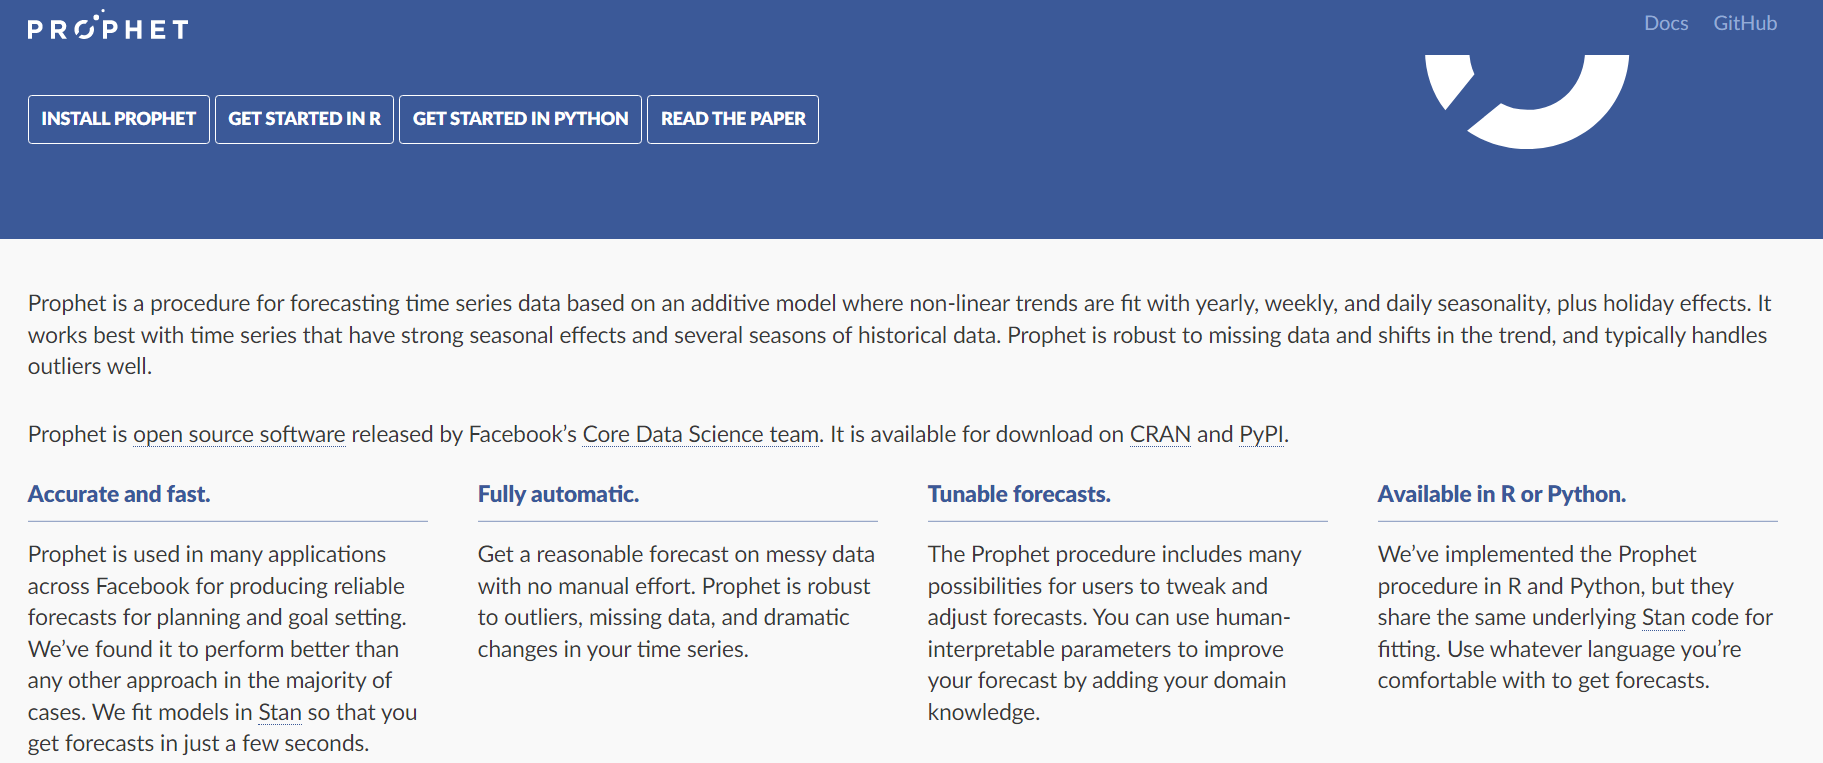


In [31]:
from fbprophet import Prophet

# prepare expected column names
df2 = df.copy()
df2.columns = ['ds', 'y']

# define the model
model = Prophet()

# fit model
model.fit(df2)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### **In sample forecast**

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14334.737769  12719.272268  15858.926845
1 1968-02-01  14905.955964  13291.087374  16417.933405
2 1968-03-01  20842.150502  19300.274814  22510.649117
3 1968-04-01  22870.095215  21225.924785  24447.209546
4 1968-05-01  24176.211162  22559.073713  25830.779114


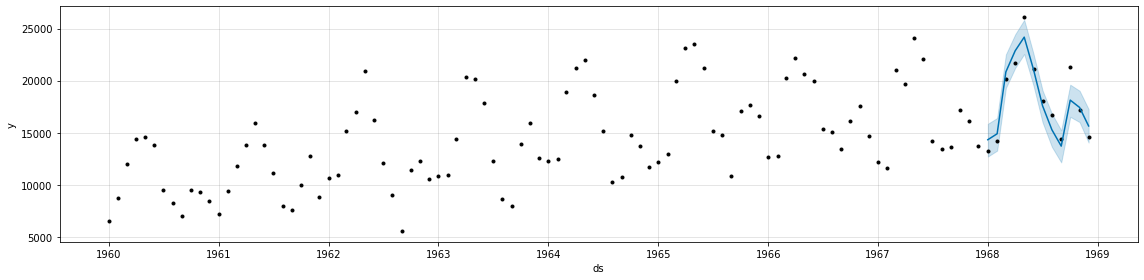

In [32]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
 
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast, figsize=(16,4))
plt.show()



In [33]:
from statsmodels.tools.eval_measures import rmse
a = df2['y'][-12:]
b = forecast['yhat']
rmse(a,b)
#prophet_mse_error = prophet_rmse_error**2
#mean_value = df2['y'][-13:-1].mean()

#print(f'RMSE Error: {rmse(a, b)}')

1335.4381994106006

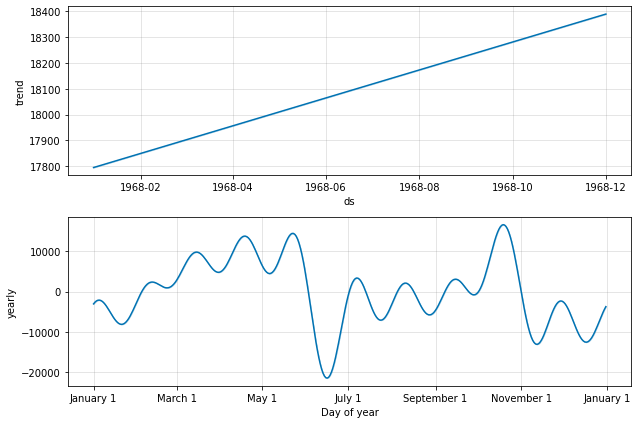

In [34]:
fig1 = model.plot_components(forecast)

### **Out of sample forecast**

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15375.960093  13886.968997  17072.665043
1 1969-02-01  16142.271673  14520.129662  17699.500074
2 1969-03-01  21351.832640  19719.202443  22889.857960
3 1969-04-01  23477.889811  21947.058926  25076.739697
4 1969-05-01  24988.440907  23379.913224  26523.533198


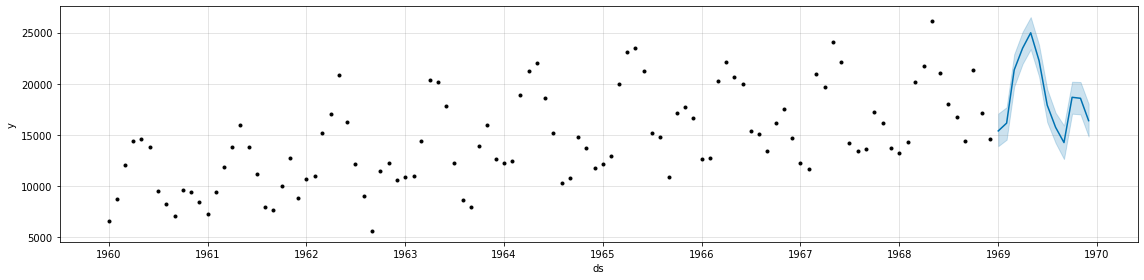

In [35]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast, figsize=(16,4))
plt.show()

#More example

In [36]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 18.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


[*********************100%***********************]  1 of 1 completed


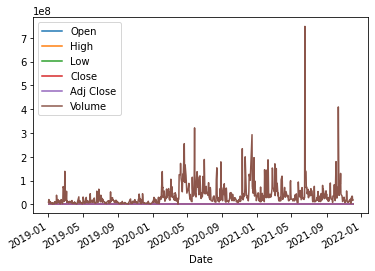

In [37]:
'''import pandas_datareader as web
import datetime
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 6, 30)
df3 = web.DataReader("AAV.BK", 'yahoo', start, end)
df3.head()'''

import yfinance as yf
data = yf.download('AAV.BK', start = '2019-01-01', end='2022-01-01')
data.head()
data.plot()

#### **Evaluation**